# 마켓 데이터 분석 04 - 이동평균과 시그널


<img width="320" src="http://i.imgur.com/Y5twMcc.jpg" >


#### 2018 FinanceData http://fb.com/financedata

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(16, 4))

In [3]:
import datetime
import pandas as pd
import FinanceDataReader as fdr

# pandas 이동평균
### pandas.stats.rolling_mean()

In [4]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 12, 31)

# KB금융(105560)
df = fdr.DataReader("105560", start, end)
df = df[df.Volume > 0]
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-04,32450,32900,33000,32150,1050000.0,-0.0211
2016-01-05,32650,32500,33100,32500,561080.0,0.0062
2016-01-06,32450,32650,33050,32300,883990.0,-0.0061
2016-01-07,32050,32350,32650,31900,636090.0,-0.0123
2016-01-08,32100,31800,32250,31550,671720.0,0.0016


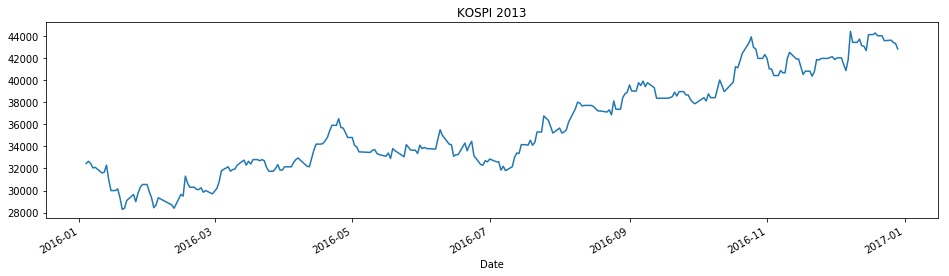

In [5]:
# 가격 Close
df['Close'].plot(figsize=(16, 4), title='KOSPI 2013')

In [6]:
df['MA_5'] = df['Close'].rolling(center=False,window=5).mean()
df['MA_20'] = df['Close'].rolling(center=False,window=20).mean()

df['diff'] = df['MA_5'] - df['MA_20']
df = df[['Volume', 'Close', 'MA_5', 'MA_20', 'diff']]
df.head(25)

,Volume,Close,MA_5,MA_20,diff
Date,,,,,
2016-01-04,1050000.0,32450,NaN,NaN,NaN
2016-01-05,561080.0,32650,NaN,NaN,NaN
2016-01-06,883990.0,32450,NaN,NaN,NaN
2016-01-07,636090.0,32050,NaN,NaN,NaN
2016-01-08,671720.0,32100,32340.0,NaN,NaN
2016-01-11,492900.0,31600,32170.0,NaN,NaN
2016-01-12,386920.0,31650,31970.0,NaN,NaN
2016-01-13,439050.0,32300,31940.0,NaN,NaN
2016-01-14,1300000.0,31000,31730.0,NaN,NaN


# 골든크로스, 데드크로스

##  골든크로스(Golden cross)
* 단기이동평균선이 중장기이동평균선을 상향돌파(크로스)하는 것.
* 즉, 5일선이 20일선을, 20일선이 60일선을, 60일선이 120일선을 돌파할 때

## 데드크로스 (Dead cross)
* 단기 이동평균선이 중장기이동평균선을 하향돌파 하는 것
* 즉, 5일선이 20일선을, 20일선이 60일선을, 60일선이 120일선을 하향 돌파

## 계산
* 단기와 장기 이동평균의 차이값(MA_5 - MA_20)를 비교
* 크로스(즉, 이전 값과 부호가 바뀌는 경우): (차이값 X 이전 차이값) < 0 

In [7]:
prev_key = prev_val = 0

for key, val in df['diff'].iteritems():
    if val == 0:
        continue
    if val * prev_val < 0 and val > prev_val:
        print ('[Golden]', key, val, df['Close'][key])
    if val * prev_val < 0 and val < prev_val:
        print ('[Dead]', key, val, df['Close'][key])
    prev_key, prev_val = key, val

[Golden] 2016-02-17 00:00:00 97.5 31300
[Dead] 2016-03-28 00:00:00 -147.5 32000
[Golden] 2016-04-07 00:00:00 150.0 32950
[Dead] 2016-05-04 00:00:00 -340.0 33500
[Golden] 2016-05-29 00:00:00 72.5 33650
[Dead] 2016-06-17 00:00:00 -280.0 33250
[Golden] 2016-07-15 00:00:00 235.0 34150
[Dead] 2016-09-20 00:00:00 -142.5 38500
[Golden] 2016-10-10 00:00:00 25.0 39200
[Dead] 2016-11-04 00:00:00 -37.5 40400
[Golden] 2016-11-16 00:00:00 112.5 41200
[Dead] 2016-11-17 00:00:00 -35.0 40500
[Golden] 2016-11-25 00:00:00 180.0 41950
[Dead] 2016-12-29 00:00:00 -45.0 42800


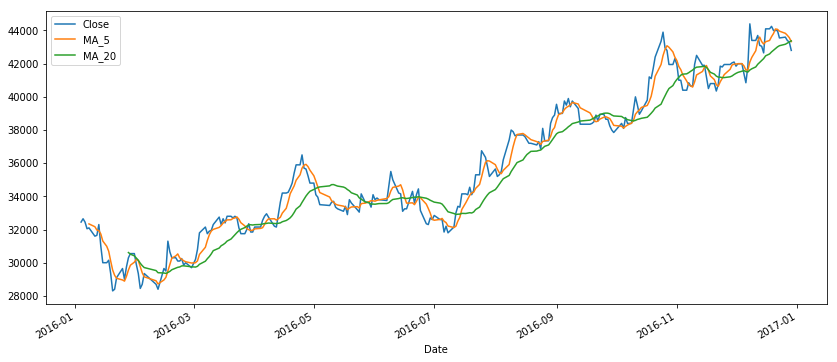

In [8]:
ax = df[['Close', 'MA_5', 'MA_20']].plot(figsize=(14,6))

##  부분확대

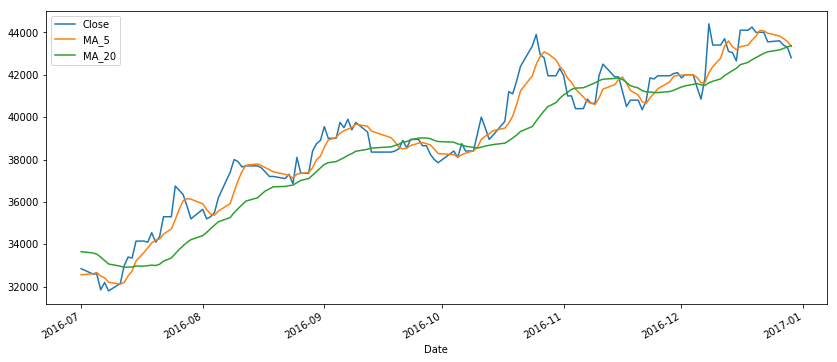

In [9]:
df[['Close', 'MA_5', 'MA_20']]['2016-07':].plot(figsize=(14,6))

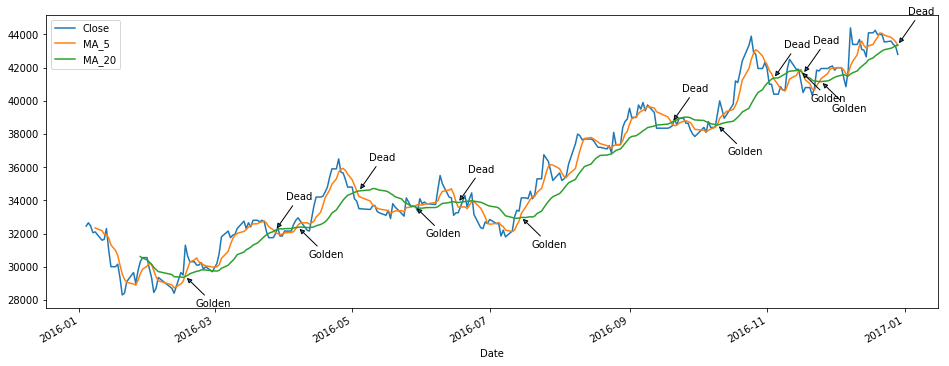

In [10]:
ax = df[['Close', 'MA_5', 'MA_20']].plot(figsize=(16,6))
prev_key = prev_val = 0

for key, val in df['diff'].iteritems():
    if val == 0:
        continue

    if val * prev_val < 0 and val > prev_val:
        ax.annotate('Golden', xy=(key, df['MA_20'][key]), xytext=(10,-30), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    elif val * prev_val < 0 and val < prev_val:
        ax.annotate('Dead', xy=(key, df['MA_20'][key]), xytext=(10,30), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
        
    prev_key, prev_val = key, val

## 매매 시그널 차트

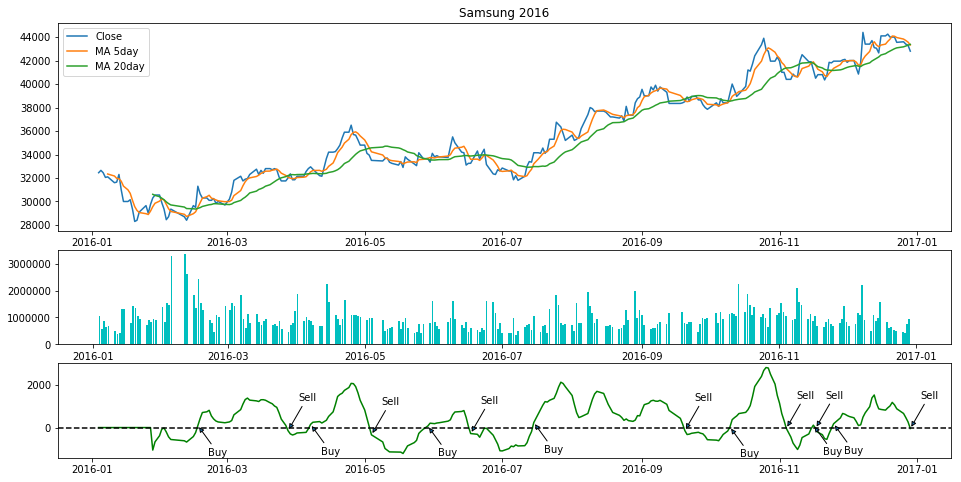

In [11]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 8)

# price (가격)
price_chart = plt.subplot2grid((4,1), (0, 0), rowspan=2)
price_chart.plot(df.index, df['Close'], label='Close')
price_chart.plot(df.index, df['MA_5'], label='MA 5day')
price_chart.plot(df.index, df['MA_20'], label='MA 20day')

plt.title('Samsung 2016')
plt.legend(loc='best')

# volume (거래량)
vol_chart = plt.subplot2grid((4,1), (2,0), rowspan=1)
vol_chart.bar(df.index, df['Volume'], color='c')

# 이동평균의 차이
signal_chart = plt.subplot2grid((4,1), (3,0), rowspan=1)
signal_chart.plot(df.index, df['diff'].fillna(0), color='g')
plt.axhline(y=0, linestyle='--', color='k')

# sell, buy annotate
prev_key = prev_val = 0

# Sell/Buy 시그널 Annotation
def annote_signal(chart, xy, text):
    textcoords='offset points'
    arrowprops=dict(arrowstyle='-|>')
    if text == 'Buy':
        xytext=(10,-30)
    elif text == 'Sell':
        xytext=(10,30)
    else:
        return
    chart.annotate(text, xy=xy, xytext=xytext, textcoords=textcoords, arrowprops=arrowprops)

for key, val in df['diff'].iteritems():
    if val == 0:
        continue
    if val * prev_val < 0 and val > prev_val:
        annote_signal(signal_chart, (key, df['diff'][key]), 'Buy')
    elif val * prev_val < 0 and val < prev_val:
        annote_signal(signal_chart, (key, df['diff'][key]), 'Sell')
    prev_key, prev_val = key, val
    

----
### 2018 FinanceData http://fb.com/financedata http://financedata.github.com